In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Датасет очень большой, поэтому пути до аудио файлов хранятся в json формате. Считываю их и преобразую в удобный pandas dataframe.

In [3]:
with open("Z:/python_project/course_work_stepanov/crowd_train/raw_crowd_train.jsonl", "r") as file:
    lines = file.read().splitlines()

In [4]:
dicts = [eval(x.replace('NaN', 'np.nan')) for x in lines]

In [5]:
df = pd.DataFrame.from_records(dicts)
df.shape

(906953, 9)

Удалив дубликаты по тексту в сообщении, датасет уменьшился в 7 раз...

In [6]:
df_not_dupl = df.drop_duplicates(subset="speaker_text")
df_not_dupl.shape

(124569, 9)

In [7]:
df_not_dupl.to_parquet('crowd_train_without_duplicates.pqt')

In [8]:
res = df_not_dupl.source_id.value_counts()

In [27]:
res

749bd4cad1ddbc7211b23a68e5f9f12a    473
8fdd37d08a1edd4c3f05f3df1e1d4a8d    462
8d912022a064613108789cd33ec6d776    413
ddea0499db65074f0de8570a460b6bc6    386
b603926497b0f7d1ce220b682622a429    380
                                   ... 
9e584abe2402b5d7186a04b65d60708b      1
b4fafe0570ca9113fcb49f8b4a399750      1
aae7f70146e3b6eeb9403bdc47fbe632      1
befd6c45215aa9a0cc4afea2b487b01b      1
40c3e6a8428818797faeb7154ae236d7      1
Name: source_id, Length: 1806, dtype: int64

Как видно, количество сообщений от пользователей сильно разнится. Для того, чтобы не столкнуться с дизбалансом классов, я буду использовать функцию get_dataframe в файлe my_funcs.py

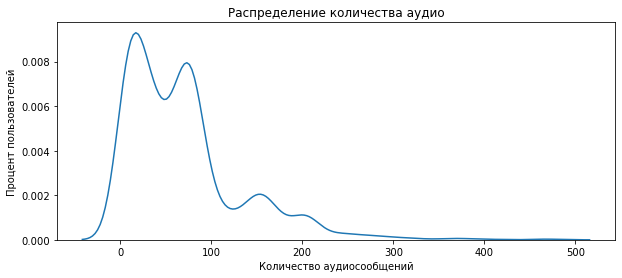

In [32]:
plt.figure(figsize=(10, 4))
plt.title('Распределение количества аудио')
sns.kdeplot(res.values)
plt.ylabel('Процент пользователей')
plt.xlabel('Количество аудиосообщений')
plt.show()

Удаляю ненужные мне столбцы и сохраняю датафрейм

In [36]:
df_final = df_not_dupl.drop(columns=['hash_id', 'annotator_emo',
                            'golden_emo', 'annotator_id', 'speaker_text', 'speaker_emo']).dropna()
df_final = df_final[df_final.source_id.isin(res.index)]
df_final.shape

(124449, 3)

In [37]:
df_final.to_parquet("crowd_train_eda.pqt", index=False)